In [131]:
import os
import sys
import ast
from pprint import pprint
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import numpy as np
import datetime as dt
%config InlineBackend.figure_format = 'retina'  # 提高 jupyter notebook 的圖形顯示解析度

In [20]:
root = '/home/wmnlab/D/database'
paths = [s for s in os.listdir(root) if s.startswith('202') and os.path.isdir(os.path.join(root, s))]

md_files = []

for date_dir in paths:
    datedir = os.path.join(root, date_dir)
    md_file = [os.path.join(datedir, s) for s in os.listdir(datedir) if s.endswith('.md')]
    md_files += md_file

md_files = sorted(md_files)

# Select dates
# md_files = md_files[:-1]
# md_files = [md_files[2]]

pprint(md_files)

['/home/wmnlab/D/database/2023-03-16/2023-03-16.md',
 '/home/wmnlab/D/database/2023-03-26/2023-03-26.md',
 '/home/wmnlab/D/database/2023-04-01/2023-04-01.md',
 '/home/wmnlab/D/database/2023-04-10/2023-04-10.md',
 '/home/wmnlab/D/database/2023-04-17/2023-04-17.md',
 '/home/wmnlab/D/database/2023-05-04/2023-05-04.md',
 '/home/wmnlab/D/database/2023-05-07/2023-05-07.md',
 '/home/wmnlab/D/database/2023-05-15/2023-05-15.md',
 '/home/wmnlab/D/database/2023-05-24/2023-05-24.md',
 '/home/wmnlab/D/database/2023-05-26/2023-05-26.md']


In [21]:
class Experiment():
    
    def __init__(self, dir_name, setting):
        
        self.dir_name = dir_name
        self.setting = setting
        
    def __repr__(self):
        return f'{self.dir_name} -> {self.setting}'

exp_list = []

for md_file in md_files:
    
    md_f = open(md_file, 'r')
    lines = []
    l = md_f.readline()[:-1]
    
    while l:
        
        if l == '#endif':
            break
        lines.append(l)
        l = md_f.readline()[:-1]
        
    md_f.close()
    
    for exp, dic in zip(lines[::2], lines[1::2]):
        
        dictionary = ast.literal_eval(dic)
        parent_dir = os.path.dirname(md_file)
        experiment = Experiment(dir_name = os.path.join(parent_dir, exp), setting=dictionary)
        exp_list.append(experiment)
        
pprint(exp_list)

[/home/wmnlab/D/database/2023-03-16/Bandlock_Udp_B1_B3_B7_B8_RM500Q -> {'qc00': 'B1', 'qc02': 'B7', 'qc03': 'B8'},
 /home/wmnlab/D/database/2023-03-26/Bandlock_Udp_All_RM500Q -> {'qc00': 'B3', 'qc02': 'B7', 'qc03': 'B8'},
 /home/wmnlab/D/database/2023-04-01/Bandlock_Udp_All_LTE_B1B3_B1B8_RM500Q -> {'qc00': 'B1B3', 'qc01': 'B1B8', 'qc02': 'LTE', 'qc03': 'All'},
 /home/wmnlab/D/database/2023-04-01/Bandlock_Udp_B1_B3_B7_B8_RM500Q -> {'qc00': 'B1', 'qc01': 'B3', 'qc02': 'B7', 'qc03': 'B8'},
 /home/wmnlab/D/database/2023-04-10/Experiment1 -> {'qc00': 'All', 'qc01': 'All', 'qc02': 'All', 'qc03': 'All'},
 /home/wmnlab/D/database/2023-04-10/Experiment2 -> {'qc00': 'B1', 'qc01': 'B3', 'qc02': 'B7', 'qc03': 'B8'},
 /home/wmnlab/D/database/2023-04-10/Experiment3 -> {'qc00': 'LTE', 'qc01': 'All', 'qc02': 'B7B8', 'qc03': 'B7'},
 /home/wmnlab/D/database/2023-04-17/Bandlock_Udp_All_LTE_All_LTE_RM500Q -> {'qc00': 'All', 'qc01': 'LTE', 'qc02': 'All', 'qc03': 'LTE'},
 /home/wmnlab/D/database/2023-04-17/

# Single

- Single: rrc_dict = {'All': [f1, f2, f3,...], 'B3':[...]}
- Dual: rrc_dict = {'All+All': [(f1, f2), (f3, f4), (f5, f6),...], 'B3':[...]}

In [22]:
# Set band parameters
schms = ['All','LTE','B1','B3', 'B7', 'B8']

rrc_dict = {}
nr_dict = {}
lte_dict = {}
ul_pkt_dict = {}
dl_pkt_dict = {}

for schm in schms:
        
    path_list = []
    
    for exp in exp_list:
        
        reverse_dict = {v:k for k, v in exp.setting.items()}
        
        try:
            dev = reverse_dict[schm]
        except:
            # print('warning:', schm)
            continue
        
        device_dir = os.path.join(exp.dir_name, dev)
        
        for trace in os.listdir(device_dir):
        
            if '#' not in trace:
                continue
        
            trace_dir = os.path.join(device_dir, trace, 'data')
            path_list.append(trace_dir)

    path_list = sorted(path_list)

    rrc_list, nr_list, lte_list, ul_pkt_list, dl_pkt_list = [], [], [], [], []

    for path in path_list:
        
        rrc_list += [os.path.join(path, s) for s in os.listdir(path) if s.endswith('_rrc.csv')]
        nr_list += [os.path.join(path, s) for s in os.listdir(path) if s.endswith('_nr_ml1.csv')]
        lte_list += [os.path.join(path, s) for s in os.listdir(path) if s.endswith('_ml1.csv') and not s.endswith('_nr_ml1.csv')]
        ul_pkt_list += [os.path.join(path, 'udp_uplk_loss_latency.csv')]
        dl_pkt_list += [os.path.join(path, 'udp_dnlk_loss_latency.csv')]
    
    rrc_dict[schm] = rrc_list
    nr_dict[schm] = nr_list
    lte_dict[schm] = lte_list
    ul_pkt_dict[schm] = ul_pkt_list
    dl_pkt_dict[schm] = dl_pkt_list

# rrc_dict['All'] = rrc_dict['All'] + rrc_dict['B3B7B8']
# nr_dict['All'] = nr_dict['All'] + nr_dict['B3B7B8']
# lte_dict['All'] = lte_dict['All'] + lte_dict['B3B7B8']
# ul_pkt_dict['All'] = ul_pkt_dict['All'] + ul_pkt_dict['B3B7B8']
# dl_pkt_dict['All'] = dl_pkt_dict['All'] + dl_pkt_dict['B3B7B8']

# schms.remove('B3B7B8')

In [5]:
# dl_pkt_dict

# Box Plot

In [6]:
def set_data(df, mode='pcap', tz=0):
    if mode == 'pcap':
        df['seq'] = df['seq'].astype('Int32')
        # df['rpkg'] = df['rpkg'].astype('Int8')
        df['frame_id'] = df['frame_id'].astype('Int32')
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df['xmit_time'] = pd.to_datetime(df['xmit_time'])
        df['arr_time'] = pd.to_datetime(df['arr_time'])
        df['Timestamp_epoch'] = df['Timestamp_epoch'].astype('float32')
        df['xmit_time_epoch'] = df['xmit_time_epoch'].astype('float32')
        df['arr_time_epoch'] = df['arr_time_epoch'].astype('float32')
        df['lost'] = df['lost'].astype('boolean')
        df['excl'] = df['excl'].astype('boolean')
        df['latency'] = df['latency'].astype('float32')
    # E-UTRA & NR
    def nr_serv_cel(row):
        pos = row.serv_cel_pos
        if pos == 255:
            return 65535, -160, -50
        else:
            return row[f'PCI{pos}'], row[f'RSRP{pos}'], row[f'RSRQ{pos}']
    if mode == 'lte':
        df = df.rename(columns={
            'RSRP(dBm)': 'RSRP',
            'RSRQ(dB)': 'RSRQ',
            'Serving Cell Index': 'serv_cel_index',
            'Number of Neighbor Cells': 'num_neigh_cels',
            'Number of Detected Cells': 'num_cels',
            }).reindex(['Timestamp','type_id','PCI','RSRP','RSRQ','serv_cel_index','EARFCN','NR_ARFCN',
                        'num_cels','num_neigh_cels','serv_cel_pos','PCI0','RSRP0','RSRQ0',
                        *df.columns.to_list()[df.columns.get_loc('PCI1'):]], axis=1)
        df.loc[df['serv_cel_index'] == '(MI)Unknown', 'serv_cel_index'] = '3_SCell'
        df['num_cels'] = df['num_neigh_cels'] + 1
        ## set dtypes
        df['Timestamp'] = pd.to_datetime(df['Timestamp']) + pd.Timedelta(hours=tz)
        df['type_id'] = df['type_id'].astype('category')
        df['serv_cel_index'] = df['serv_cel_index'].astype('category')
        df['EARFCN'] = df['EARFCN'].astype('Int32')
        df['NR_ARFCN'] = df['NR_ARFCN'].astype('Int32')
        df['num_cels'] = df['num_cels'].astype('UInt8')
        df['num_neigh_cels'] = df['num_neigh_cels'].astype('UInt8')
        df['serv_cel_pos'] = df['serv_cel_pos'].astype('UInt8')
        for tag in df.columns:
            if tag.startswith('PCI'):
                df[tag] = df[tag].astype('Int32')
            if tag.startswith(('RSRP','RSRQ')):
                df[tag] = df[tag].astype('float32')
    if mode == 'nr':
        if df.empty:
            df = pd.DataFrame(columns=['Timestamp','type_id','PCI','RSRP','RSRQ','serv_cel_index','EARFCN','NR_ARFCN',
                                       'num_cels','num_neigh_cels','serv_cel_pos','PCI0','RSRP0','RSRQ0'])
        else:
            df = df.rename(columns={
                'Raster ARFCN': 'NR_ARFCN',
                'Serving Cell Index': 'serv_cel_pos',
                'Num Cells': 'num_cels',
                }).reindex(['Timestamp','type_id','PCI','RSRP','RSRQ','serv_cel_index','EARFCN','NR_ARFCN',
                            'num_cels','num_neigh_cels','serv_cel_pos','PCI0','RSRP0','RSRQ0',
                            *df.columns.to_list()[df.columns.get_loc('PCI1'):]], axis=1)
            df.loc[df['serv_cel_pos'] != 255, 'serv_cel_index'] = 'PSCell'
            df[['PCI','RSRP','RSRQ']] = df.apply(nr_serv_cel, axis=1, result_type='expand')
            df.loc[df['serv_cel_pos'] == 255, 'num_neigh_cels'] = df['num_cels']
            df.loc[df['serv_cel_pos'] != 255, 'num_neigh_cels'] = df['num_cels'] - 1
        ## set dtypes
        df['Timestamp'] = pd.to_datetime(df['Timestamp']) + pd.Timedelta(hours=tz)
        df['type_id'] = df['type_id'].astype('category')
        df['serv_cel_index'] = df['serv_cel_index'].astype('category')
        df['EARFCN'] = df['EARFCN'].astype('Int32')
        df['NR_ARFCN'] = df['NR_ARFCN'].astype('Int32')
        df['num_cels'] = df['num_cels'].astype('UInt8')
        df['num_neigh_cels'] = df['num_neigh_cels'].astype('UInt8')
        df['serv_cel_pos'] = df['serv_cel_pos'].astype('UInt8')
        for tag in df.columns:
            if tag.startswith('PCI'):
                df[tag] = df[tag].astype('Int32')
            if tag.startswith(('RSRP','RSRQ')):
                df[tag] = df[tag].astype('float32')
    return df

In [7]:
DD = {key: [0, []] for key in schms}

for schm in schms:

    dl_files = dl_pkt_dict[schm]

    for dl_file in dl_files:

        df_dl = pd.read_csv(dl_file)
        df_dl = set_data(df_dl)
        dlplr = df_dl.lost.mean() * 100
        
        # print(round(dlplr, 2))
        
        DD[schm][0] += 1
        DD[schm][1].append(dlplr)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

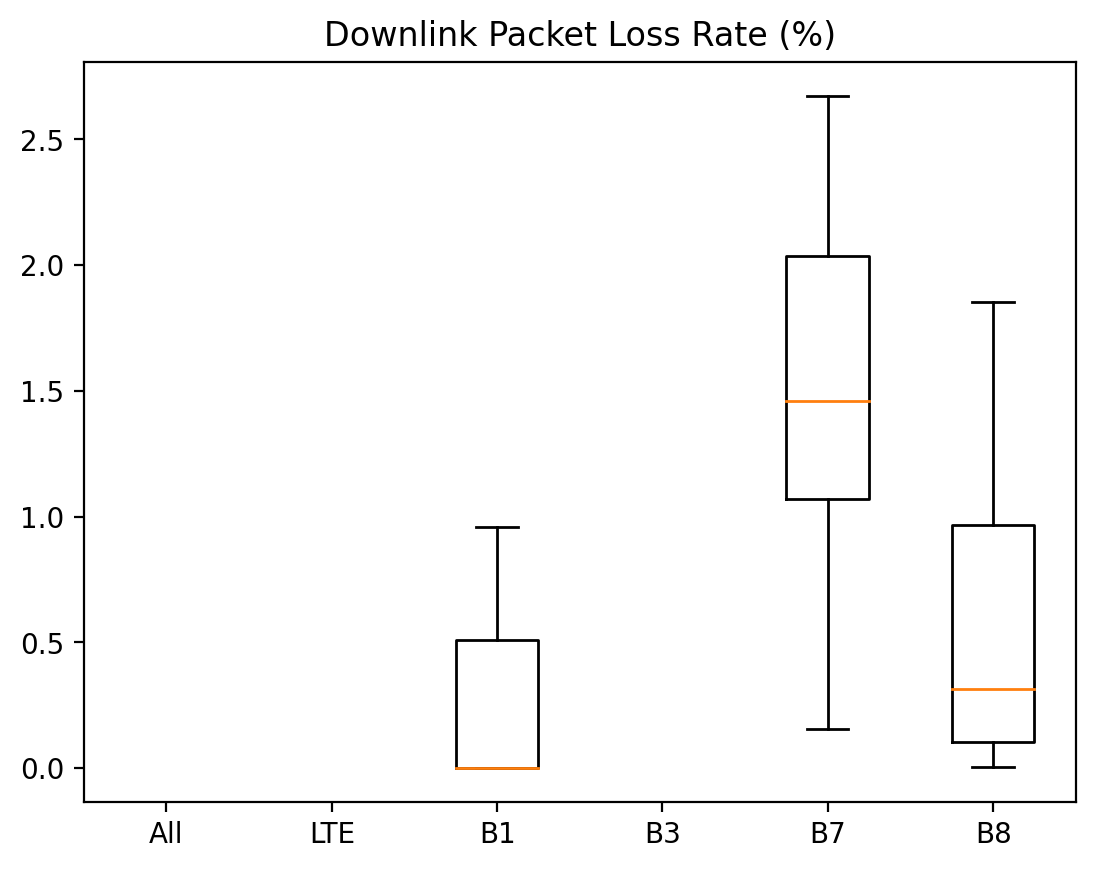

In [94]:
# Downlink
boxes = [DD[schm][1] for schm in schms]
labels = schms
plt.figure()
plt.boxplot(boxes, labels=labels, showfliers=True)
plt.title('Downlink Packet Loss Rate (%)')
plt.show()

# Handover Numbers

In [95]:
pdir = os.path.abspath(os.path.join(os.getcwd(), '.'))  # for jupyter-notebook
sys.path.insert(1, pdir)
from myutils import *

handover1 = ['LTE_HO','MN_HO','SN_HO','SN_Setup','SN_Rel','SN_Rel_MN_HO',
             'SCG_Failure','MCG_Failure','NAS_Recovery',]

handover2 = ['LTE_HO','MN_HO','SN_HO','SN_Setup','SN_Rel','SN_Rel_MN_HO',
             'SCG_Failure_t310-Expiry (0)','SCG_Failure_randomAccessProblem (1)','SCG_Failure_rlc-MaxNumRetx (2)','SCG_Failure_synchReconfigFailureSCG (3)','SCG_Failure_scg-ReconfigFailure (4)','SCG_Failure_srb3-IntegrityFailure (5)','SCG_Failure_other-r16 (6)',
             'MCG_Failure_reconfigurationFailure (0)','MCG_Failure_handoverFailure (1)','MCG_Failure_otherFailure (2)',
             'NAS_Recovery_reconfigurationFailure (0)','NAS_Recovery_handoverFailure (1)','NAS_Recovery_otherFailure (2)']

In [96]:
table = pd.DataFrame(columns=[*handover1, 'rounds'])

for key, lst in rrc_dict.items():
    
    ho_dict = {k:0 for k in handover1}
    
    for path in lst:
        
        df, _, _ = mi_parse_ho(pd.read_csv(path), tz=8)
        df['ho_type0'] = df['ho_type'].astype('string')
        df.loc[df['cause'].notna(), 'ho_type0'] = df['ho_type'].astype('string') + '_' + df['cause'].astype('string')
        df['ho_type0'] = df['ho_type0'].astype('category')

        for tag in handover1:
            ho_dict[tag] += sum(df['ho_type'] == tag)
    
    new_row = pd.DataFrame(ho_dict, index=[key])
    table = pd.concat([table, new_row])
    table.at[key, 'rounds'] = len(lst)

In [97]:
table

,LTE_HO,MN_HO,SN_HO,SN_Setup,SN_Rel,SN_Rel_MN_HO,SCG_Failure,MCG_Failure,NAS_Recovery,rounds
All,0,0,0,0,0,0,0,0,0,0
LTE,0,0,0,0,0,0,0,0,0,0
B1,198,0,0,0,0,0,0,12,0,12
B3,0,0,0,0,0,0,0,0,0,0
B7,1,203,188,92,4,45,3,43,0,12
B8,1,233,207,43,1,24,2,9,1,12


In [99]:
table1 = table.copy()
for tag in handover1:
    table1[tag] = table1[tag].astype('float64')
    table1[tag] = table1[tag] / (table1['rounds'] + 1e-9)
    table1[tag] = table1[tag].apply(lambda x: round(x, 2))
table1

,LTE_HO,MN_HO,SN_HO,SN_Setup,SN_Rel,SN_Rel_MN_HO,SCG_Failure,MCG_Failure,NAS_Recovery,rounds
All,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
LTE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
B1,16.50,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,12
B3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
B7,0.08,16.92,15.67,7.67,0.33,3.75,0.25,3.58,0.00,12
B8,0.08,19.42,17.25,3.58,0.08,2.00,0.17,0.75,0.08,12


# Plot

In [24]:
rrc_dict

{'All': ['/home/wmnlab/D/database/2023-04-01/Bandlock_Udp_All_LTE_B1B3_B1B8_RM500Q/qc03/#01/data/diag_log_qc03_2023-04-01_15-21-12_rrc.csv',
  '/home/wmnlab/D/database/2023-04-01/Bandlock_Udp_All_LTE_B1B3_B1B8_RM500Q/qc03/#02/data/diag_log_qc03_2023-04-01_15-30-33_rrc.csv',
  '/home/wmnlab/D/database/2023-04-01/Bandlock_Udp_All_LTE_B1B3_B1B8_RM500Q/qc03/#03/data/diag_log_qc03_2023-04-01_15-37-38_rrc.csv',
  '/home/wmnlab/D/database/2023-04-01/Bandlock_Udp_All_LTE_B1B3_B1B8_RM500Q/qc03/#04/data/diag_log_qc03_2023-04-01_15-51-06_rrc.csv',
  '/home/wmnlab/D/database/2023-04-10/Experiment1/qc03/#01/data/diag_log_qc03_2023-04-10_15-05-44_rrc.csv',
  '/home/wmnlab/D/database/2023-04-10/Experiment1/qc03/#02/data/diag_log_qc03_2023-04-10_15-19-16_rrc.csv',
  '/home/wmnlab/D/database/2023-04-10/Experiment3/qc01/#01/data/diag_log_qc01_2023-04-10_16-29-38_rrc.csv',
  '/home/wmnlab/D/database/2023-04-10/Experiment3/qc01/#02/data/diag_log_qc01_2023-04-10_16-42-04_rrc.csv',
  '/home/wmnlab/D/databas

In [145]:
schm = 'All'
index = 1

## iterate

In [239]:
index += 1

pdir = os.path.abspath(os.path.join(os.getcwd(), '.'))  # for jupyter-notebook
sys.path.insert(1, pdir)
from myutils import *

df_ul = pd.read_csv(ul_pkt_dict[schm][index])
df_ul = set_data(df_ul)

df_dl = pd.read_csv(dl_pkt_dict[schm][index])
df_dl = set_data(df_dl)

df_eutra = pd.read_csv(lte_dict[schm][index])
df_eutra = set_data(df_eutra, mode='lte', tz=8)
df_eutra = df_eutra[df_eutra['Timestamp'] > min(df_ul.at[0, "Timestamp"], df_dl.at[0, "Timestamp"])]
            
df_nr = pd.read_csv(nr_dict[schm][index])
df_nr = set_data(df_nr, mode='nr', tz=8)
df_nr = df_nr[df_nr['Timestamp'] > min(df_ul.at[0, "Timestamp"], df_dl.at[0, "Timestamp"])]

df_ho = pd.read_csv(rrc_dict[schm][index])
df_ho, _, _ = mi_parse_ho(df_ho, tz=8)
df_ho['ho_type0'] = df_ho['ho_type'].astype('string')
df_ho.loc[df_ho['cause'].notna(), 'ho_type0'] = df_ho['ho_type'].astype('string') + '_' + df_ho['cause'].astype('string')
df_ho['ho_type0'] = df_ho['ho_type0'].astype('category')
df_ho = df_ho[df_ho['start'] > min(df_ul.at[0, "Timestamp"], df_dl.at[0, "Timestamp"])]

print(rrc_dict[schm][index])
print(schm)
print(index)

IndexError: list index out of range

In [ ]:
df_pcel = df_eutra.loc[df_eutra['serv_cel_index'] == 'PCell', ['Timestamp','PCI','EARFCN','RSRP','RSRQ']].reset_index(drop=True).copy()
df_pcel['Time'] = df_pcel['Timestamp'].dt.strftime("%H:%M:%S")
df_pcel['index_cng'] = df_pcel['PCI'].diff().fillna(1)
df_pcel['earfcn_cng'] = df_pcel['EARFCN'].diff().fillna(1)
table = df_pcel.loc[(df_pcel['index_cng'] != 0) | (df_pcel['earfcn_cng'] != 0), ['Time','PCI','EARFCN']].reset_index(drop=True).copy()
print('PCell Sequence')
display(table.T)

df_pscel = df_nr.loc[df_nr['serv_cel_index'] == 'PSCell', ['Timestamp','PCI','NR_ARFCN','RSRP','RSRQ']].reset_index(drop=True).copy()
df_pscel['Time'] = df_pscel['Timestamp'].dt.strftime("%H:%M:%S")
df_pscel['index_cng'] = df_pscel['PCI'].diff().fillna(1)
df_pscel['arfcn_cng'] = df_pscel['NR_ARFCN'].diff().fillna(1)
table = df_pscel.loc[(df_pscel['index_cng'] != 0) | (df_pscel['arfcn_cng'] != 0), ['Time','PCI','NR_ARFCN']].reset_index(drop=True).copy()
print('PSCell Sequence')
display(table.T)

PCell Sequence


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Time,17:28:05,17:28:52,17:28:55,17:28:56,17:29:10,17:29:47,17:29:51,17:30:05,17:30:24,17:31:13,17:31:31,17:31:34,17:31:36,17:31:58,17:32:14,17:32:30,17:32:33,17:32:38
PCI,362,73,370,73,294,73,16,180,244,205,11,138,11,130,122,178,394,122
EARFCN,3050,3050,3050,3050,3050,3050,3050,3650,3650,3650,3650,3650,3650,3650,3650,3650,3650,3650


PSCell Sequence


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Time,17:28:05,17:28:09,17:28:28,17:28:29,17:28:53,17:28:55,17:28:58,17:29:52,17:30:00,17:30:03,...,17:31:17,17:31:38,17:31:39,17:31:59,17:32:01,17:32:05,17:32:11,17:32:15,17:32:25,17:32:35
PCI,350,362,370,362,73,370,73,180,16,180,...,205,138,11,55,3,130,3,122,386,394
NR_ARFCN,631000,631000,631000,631000,631000,631000,631000,631000,631000,631000,...,631000,631000,631000,631000,631000,631000,631000,631000,631000,631000


In [240]:
print(os.path.dirname(rrc_dict[schm][index]))

handover = ['LTE_HO','MN_HO','SN_HO','SN_Setup','SN_Rel','SN_Rel_MN_HO',
            'SCG_Failure_t310-Expiry (0)','SCG_Failure_randomAccessProblem (1)','SCG_Failure_rlc-MaxNumRetx (2)','SCG_Failure_synchReconfigFailureSCG (3)','SCG_Failure_scg-ReconfigFailure (4)','SCG_Failure_srb3-IntegrityFailure (5)','SCG_Failure_other-r16 (6)',
            'MCG_Failure_reconfigurationFailure (0)','MCG_Failure_handoverFailure (1)','MCG_Failure_otherFailure (2)',
            'NAS_Recovery_reconfigurationFailure (0)','NAS_Recovery_handoverFailure (1)','NAS_Recovery_otherFailure (2)']
# cmap = bpy_color_palette(len(handover), 0.2)
cmap = plt.cm.get_cmap('gist_rainbow', len(handover))
clist = [matplotlib.colors.to_hex(cmap(i)) for i in range(cmap.N)]
cdict = {tag:color for color, tag in zip(clist, handover)}

fig, axs = plt.subplots(4,1, figsize=(9, 6), sharex=True)
fig.suptitle(f'{schm} Loss Latency')
plt.gcf().autofmt_xdate()

axs[0].set_ylim([-140, -44])
axs[0].set_ylabel('RSRP (dBm)')
x = df_pcel["Timestamp"].iloc[:]
y = df_pcel["RSRP"].iloc[:].astype(float)
# eutra_rsrp_plot, = axs[0].plot(x, y, c='r', label='LTE RSRP', linewidth=1.0)
eutra_rsrp_plot, = axs[0].plot(x, y, c='r', linewidth=1.0)
axs[0].axhline(-110, c='tab:gray', linestyle='-.', linewidth=0.9)
ax = axs[0].twinx()
ax.set_ylim([-19.5, -3])
ax.set_ylabel('RSRQ (dB)')
x = df_pcel["Timestamp"].iloc[:]
y = df_pcel["RSRQ"].iloc[:].astype(float)
# eutra_rsrq_plot, = ax.plot(x, y, c='r', label='LTE RSRQ', linewidth=1.0)
eutra_rsrq_plot, = ax.plot(x, y, c='b', linewidth=1.0)

ho_plots = []
ho_types = []
x = df_ho["Timestamp"].array
group = group = df_ho["ho_type0"].array
for tag in handover:
    indices = np.where(group == tag)[0]
    if len(indices) == 0:
        continue
    ho_types.append(tag)
    ho_plots.append(axs[0].vlines(x[indices], ymin=-140, ymax=-44, color=cdict[tag], linewidth=1.0, label=tag))

axs[1].set_ylim([-156, -31])
axs[1].set_ylabel('NR RSRP (dBm)')
x = df_pscel["Timestamp"].iloc[:]
y = df_pscel["RSRP"].iloc[:].astype(float)
# nr_rsrp_plot, = axs[1].plot(x, y, c='r', label='NR RSRP', linewidth=1.0)
nr_rsrp_plot, = axs[1].plot(x, y, c='r', linewidth=1.0)
axs[1].axhline(-110, c='tab:gray', linestyle='-.', linewidth=0.9)
ax = axs[1].twinx()
ax.set_ylim([-22.19, 6.39])
ax.set_ylabel('NR RSRQ (dB)')
x = df_pscel["Timestamp"].iloc[:]
y = df_pscel["RSRQ"].iloc[:].astype(float)
# nr_rsrq_plot, = ax.plot(x, y, c='r', label='NR RSRQ', linewidth=1.0)
nr_rsrq_plot, = ax.plot(x, y, c='b', linewidth=1.0)

x = df_ho["Timestamp"].array
group = group = df_ho["ho_type0"].array
for tag in handover:
    indices = np.where(group == tag)[0]
    if len(indices) == 0:
        continue
    axs[1].vlines(x[indices], ymin=-156, ymax=-31, color=cdict[tag], linewidth=1.0)

axs[2].set_ylim([0, 900])
axs[2].set_ylabel('UL Latency (ms)')
x = df_ul["Timestamp"].iloc[:]
y = [s*1000 for s in df_ul["latency"].iloc[:]]
axs[2].plot(x, y, label='UL Latency', alpha=0.9)
x2 = df_ul.loc[df_ul['lost'] == True, "Timestamp"].iloc[:]
axs[2].vlines(x2, ymin=0, ymax=100000, color='r', label='UL Loss', alpha=0.4)

axs[3].set_ylim([0, 500])
axs[3].set_ylabel('DL Latency (ms)')
x = df_dl["Timestamp"].iloc[:]
y = [s*1000 for s in df_dl["latency"].iloc[:]]
axs[3].plot(x, y, label='DL Latency', alpha=0.9)
x2 = df_dl.loc[df_dl['lost'] == True, "Timestamp"].iloc[:]
axs[3].vlines(x2, ymin=0, ymax=100000, color='r', label='DL Loss', alpha=0.4)

### adjust figure layout
handles = ho_plots
labels = ho_types

axbox = axs[3].get_position()
fig.legend(
    handles=handles, labels=labels,
    loc='lower center',
    bbox_to_anchor=[0, axbox.y0-0.3,1,1],
    # ncol=3,
    ncol=4,
)

s = os.path.dirname(rrc_dict[schm][index])
year = int(s[24:34].split('-')[0])
month = int(s[24:34].split('-')[1])
day = int(s[24:34].split('-')[2])

# axs[0].set_xlim([dt.datetime(year, month, day, 15, 14, 30), dt.datetime(year, month, day, 15, 15, 30)])

fig.tight_layout()

IndexError: list index out of range